In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Loading the data & split it to train and test:

In [2]:
import tensorflow as tf

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
len(x_train), len(x_test)

(50000, 10000)

In [4]:
# print first train image
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
# creatte a function to show any image I want

import matplotlib.pyplot as plt


def show_image(i):
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.show()

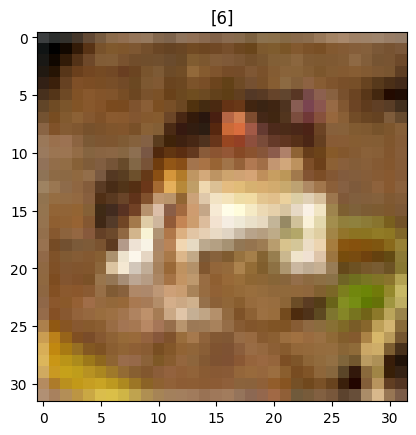

In [6]:
show_image(0)

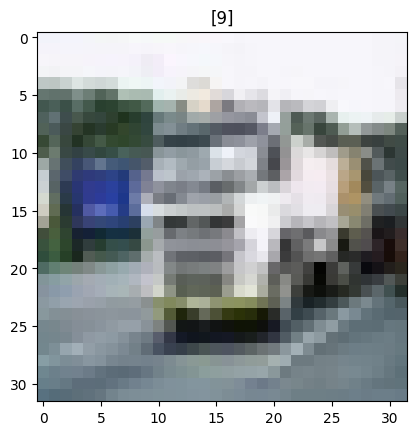

In [7]:
show_image(1000)

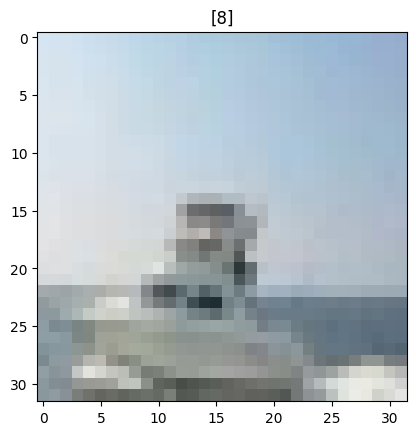

In [8]:
show_image(100)

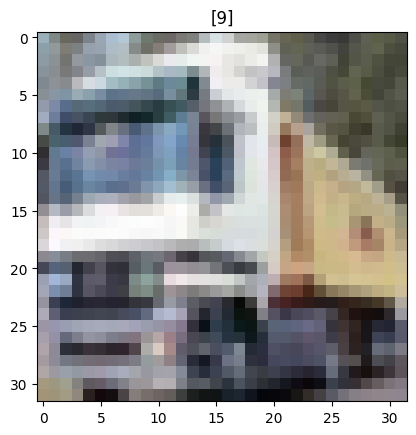

In [9]:
show_image(1)

In [10]:
classes = ['', 'airplane', 'automobile', 'bird', 'cat', 'dog',
            'frog', 'horse', 'ship', 'truck']

In [11]:
y_train.dtype

dtype('uint8')

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train[0][0], y_train[3][0], y_train[1000][0]

(6, 4, 9)

In [14]:
classes[y_train[100][0]], classes[y_train[0][0]]

('ship', 'frog')

In [15]:
# from tensorflow import keras

# y_train_cat = keras.utils.to_categorical(
#     y_train, num_classes = 10
# )

In [16]:
# y_train, y_train.dtype

## Build a model using ResNet18 with freeze a base layer:

In [17]:
# to use ResNet18 we must use ResNet50 and configure it to behave like ResNet18

from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3), pooling='avg')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
# base_model.get_layer('conv1').kernel_size = (3, 3)  # Change from (7,7) to (3,3)
# base_model.get_layer('conv1').strides = (1, 1)     # Change from (2,2) to (1,1)

In [19]:
# freeze the base layers
base_model.trainable = False

In [20]:
# build our model
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    base_model,
    layers.Dense(256, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [21]:
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath='/kaggle/working/best_model.keras',  # Filepath to save the model
    monitor='val_loss',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    save_weights_only=False,  # Save the full model
    mode='min',  # Save the model with the minimum value of the monitored metric
    verbose=3  # Verbosity mode, 0 or 1
)

In [23]:
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs = 15,
    validation_data = (x_test, y_test),
    validation_steps = 8,
    callbacks=[checkpoint_callback]
)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5021 - loss: 1.5262
Epoch 1: val_loss improved from inf to 1.20615, saving model to /kaggle/working/best_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - accuracy: 0.5022 - loss: 1.5261 - val_accuracy: 0.5703 - val_loss: 1.2062
Epoch 2/15
1559/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6259 - loss: 1.0492
Epoch 2: val_loss improved from 1.20615 to 1.05427, saving model to /kaggle/working/best_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6259 - loss: 1.0492 - val_accuracy: 0.6328 - val_loss: 1.0543
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6595 - loss: 0.9550
Epoch 3: val_loss did not improve from 1.05427
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6595 - loss: 0.9551 - val_accuracy: 0.6250 - val_loss: 1.0764
Epoch 4/15
1556/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6876 - loss: 0.8787
Epoch 4: val_loss did not improve from 1.0

In [24]:
loss, acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5838 - loss: 1.9064


## Try the same model without freezing the base layer:

In [25]:
base_model.trainable = True

In [26]:
model2 = models.Sequential([
    base_model,
    layers.Dense(256, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [27]:
model2.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
checkpoint_callback = ModelCheckpoint(
    filepath='/kaggle/working/best_model2.keras',  # Filepath to save the model
    monitor='val_loss',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    save_weights_only=False,  # Save the full model
    mode='min',  # Save the model with the minimum value of the monitored metric
    verbose=3  # Verbosity mode, 0 or 1
)

In [29]:
history = model2.fit(
    x_train, y_train,
    batch_size=32,
    epochs = 15,
    validation_data = (x_test, y_test),
    validation_steps = 8,
    callbacks=[checkpoint_callback]
)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4672 - loss: 1.6098
Epoch 1: val_loss improved from inf to 2.10919, saving model to /kaggle/working/best_model2.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 41ms/step - accuracy: 0.4672 - loss: 1.6097 - val_accuracy: 0.3359 - val_loss: 2.1092
Epoch 2/15
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5433 - loss: 1.3270
Epoch 2: val_loss improved from 2.10919 to 1.37781, saving model to /kaggle/working/best_model2.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.5434 - loss: 1.3268 - val_accuracy: 0.5508 - val_loss: 1.3778
Epoch 3/15
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6203 - loss: 1.1020
Epoch 3: val_loss improved from 1.37781 to 1.24465, saving model to /kaggle/working/best_model2.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6203 - loss: 1.1021 - val_accuracy: 0.5742 - val_loss: 1.2446
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 

In [30]:
loss, acc = model2.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6943 - loss: 0.9038


## code from AI:

In [31]:
from tensorflow.keras import layers, models, Sequential


# Simple preprocessing (normalize to 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define a simplified ResNet18-like model3
def build_resnet18(input_shape=(32, 32, 3), num_classes=10):
    def residual_block(x, filters, stride=1):
        shortcut = x
        
        x = layers.Conv2D(filters, (3, 3), strides=stride, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        
        x = layers.Conv2D(filters, (3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        
        if stride != 1:
            shortcut = layers.Conv2D(filters, (1, 1), strides=stride)(shortcut)
            shortcut = layers.BatchNormalization()(shortcut)
            
        x = layers.Add()([x, shortcut])
        x = layers.ReLU()(x)
        return x
    
    inputs = layers.Input(shape=input_shape)
    
    # Initial conv layer
    x = layers.Conv2D(64, (3, 3), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    # Residual blocks
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)
    
    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    return models.Model(inputs, outputs)

# Build and compile the model3
model3 = build_resnet18()
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model3
history = model3.fit(x_train, y_train,
                    batch_size=64,
                    epochs=10,
                    validation_data=(x_test, y_test))

# Evaluate
test_loss, test_acc = model3.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc*100:.1f}%")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 82ms/step - accuracy: 0.4614 - loss: 1.5242 - val_accuracy: 0.4988 - val_loss: 1.7276
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.7283 - loss: 0.7736 - val_accuracy: 0.5057 - val_loss: 1.8129
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.8064 - loss: 0.5515 - val_accuracy: 0.6475 - val_loss: 1.1380
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.8534 - loss: 0.4211 - val_accuracy: 0.6184 - val_loss: 1.2815
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.8896 - loss: 0.3189 - val_accuracy: 0.7473 - val_loss: 0.8241
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.9224 - loss: 0.2221 - val_accuracy: 0.7716 - val_loss: 0.7609
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.9458 - loss: 0.1534 - val_accuracy: 0.7611 - val_loss: 0.8659
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.9594 - loss: 0.1169 - 